# Polyadenylation Analysis 

#### By Roham Razaghi (rrazagh1@jhu.edu)

In [52]:
import numpy as np
isoform_file = open('./nvrna.180828.read.isoform.map.txt')
polya_file = open('NA12878_DirectRNA_polyA_primary.txt')
read_to_gene = {}
read_to_isogene = {}
isoform_to_polya_length = {}
gene_to_polya_length = {}
polya_lengths = []

for line in isoform_file:
    line_arr = line.strip().split('\t')
    read_id = line_arr[0]
    isoform_id = line_arr[1].split('_')[0].split('.')[0]
    gene_id = line_arr[1].split('_')[1].split('.')[0]
    iso_gene_id = isoform_id + '_' + gene_id
    read_to_isogene[read_id] = iso_gene_id
    read_to_gene[read_id] = gene_id
    
for line in polya_file:
    line_arr = line.strip().split('\t')
    read_id = line_arr[0]
    polya_length = line_arr[8]
    qc_taq = line_arr[9]
    if qc_taq == 'PASS' and float(polya_length) <= 600 and read_id in read_to_isogene.keys():
        
        isoform_to_polya_length.setdefault(read_to_isogene[read_id],[]).append(float(polya_length))
        gene_to_polya_length.setdefault(read_to_gene[read_id],[]).append(float(polya_length))
        polya_lengths.append(float(polya_length))
        
outF = open("nvrna.polya.genes.txt", "w")
print("Gene_ID\tReads\tMean\tMedian\tSD", end="\n", file=outF)
[print(str(k+'\t'+ str(len(v))+'\t' + str(np.mean(v))+ '\t' + str(np.median(v))+ '\t'+ str(np.std(v))), end="\n", file=outF) for k,v in gene_to_polya_length.items()]        

outF2 = open("nvrna.polya.isoforms.txt", "w")
print("Isoform_ID\tGene_ID\treads\tMean\tMedian\tSD", end="\n", file=outF2)
[print(str(k.split('_')[0]+'\t'+ k.split('_')[1] + '\t' + str(len(v))+'\t' + str(np.mean(v))+ '\t' + str(np.median(v))+ '\t'+ str(np.std(v))), end="\n", file=outF2) for k,v in isoform_to_polya_length.items()]        
outF.close()
outF2.close()
isoform_file.close()
polya_file.close()


In [53]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
sns.set(color_codes=True)
import matplotlib
%matplotlib inline
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
# EEF2

params = {'legend.fontsize': 20,
          'legend.handlelength': 2,
          'axes.titlesize' : 40,
          'axes.labelsize' : 40,
          'lines.linewidth' : 3,
          'lines.markersize' : 10,
          'xtick.labelsize' : 25,
          'ytick.labelsize' : 25}
plt.rcParams.update(params)

sns.set_style('ticks')
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
plt.rcParams['figure.figsize']=30,10


# All Reads analysis

Text(0,0.5,'NA12878')

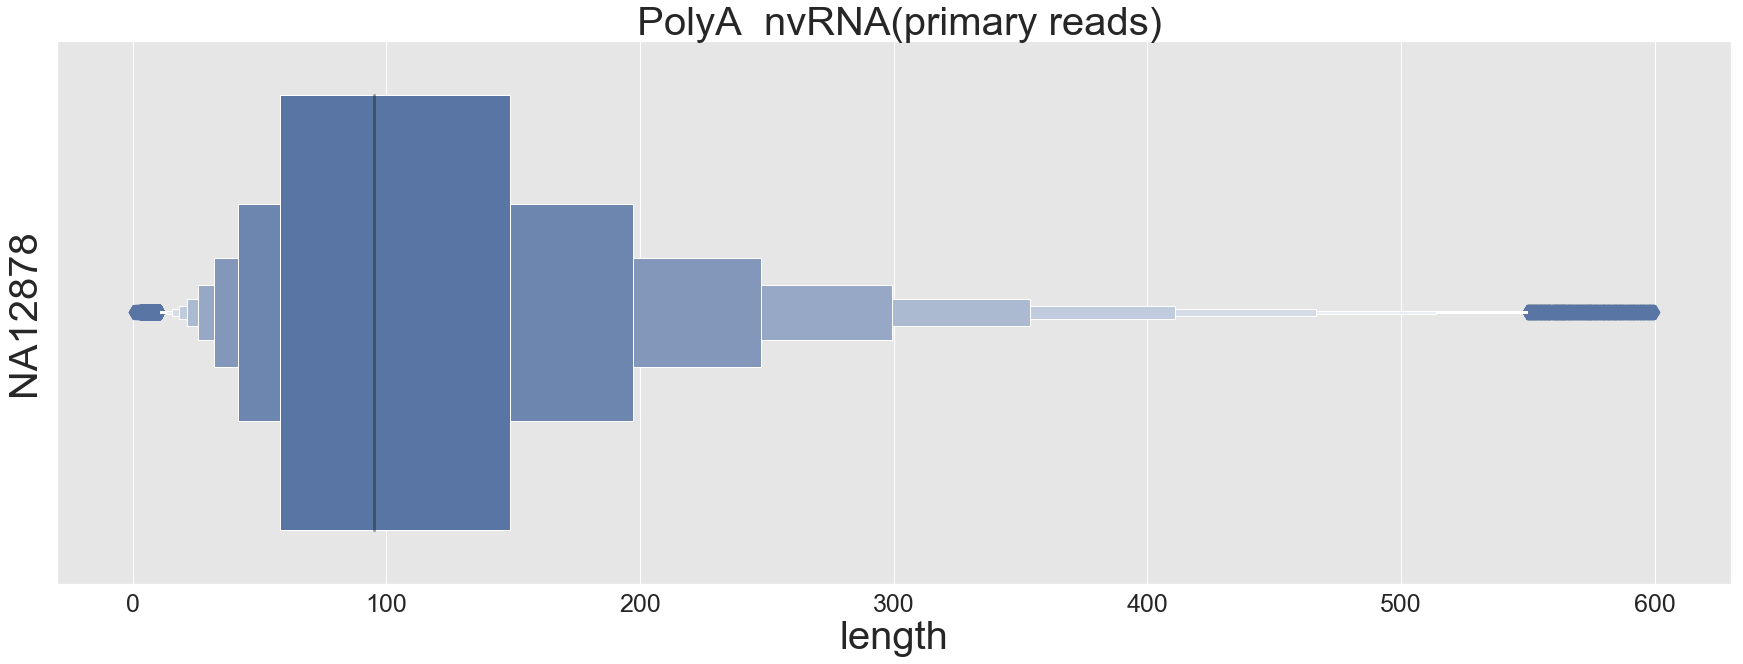

In [54]:
ax = sns.boxenplot(polya_lengths)
plt.title( ' PolyA  nvRNA(primary reads)')
plt.xlabel('length')
plt.ylabel('NA12878')
# plt.show()
# plt.savefig('polya_primary.pdf',format='pdf')

/Users/roham/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Average polyA length for all the reads is: 114.1670975153072


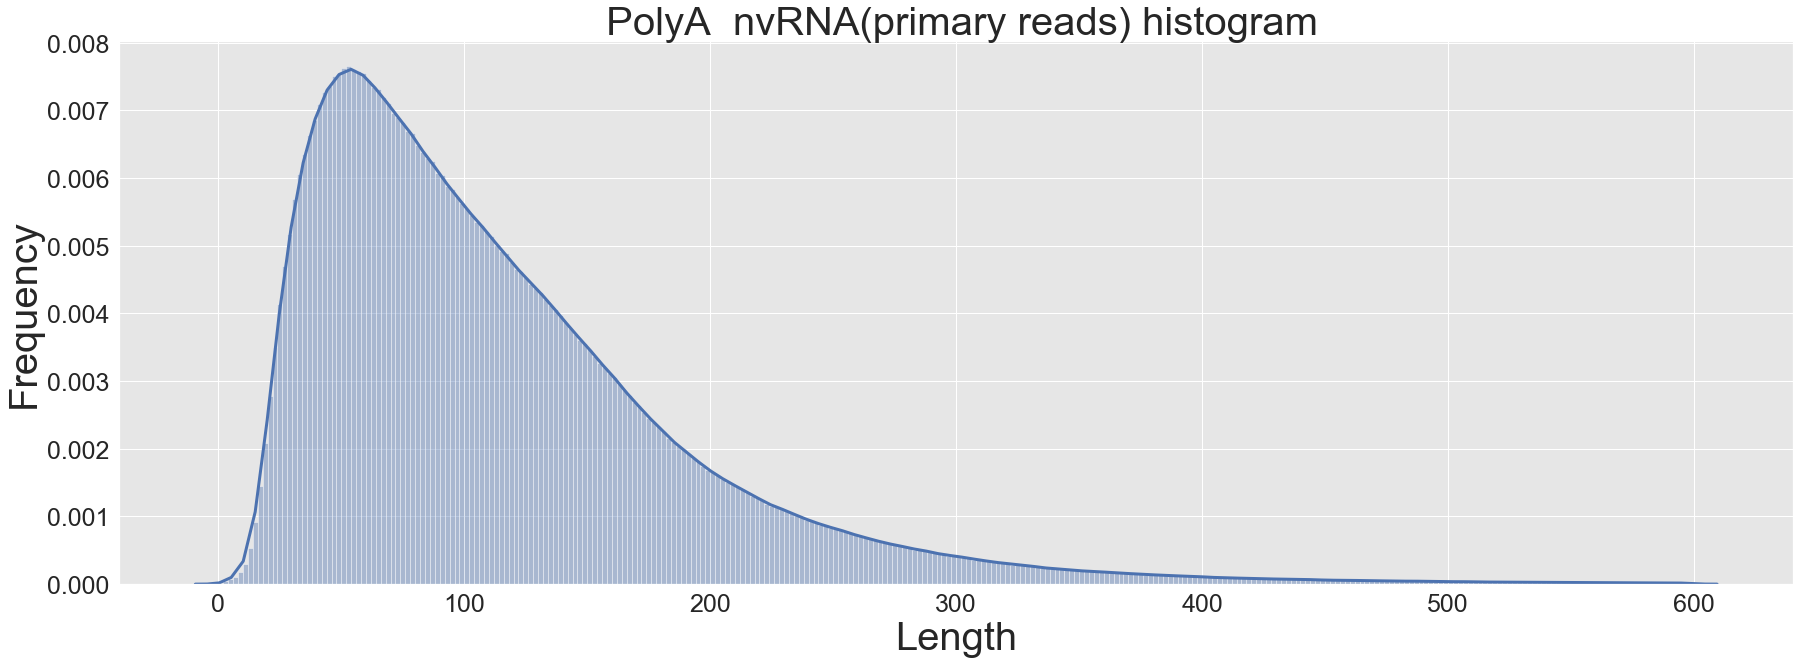

In [55]:
sns.distplot([x for x in polya_lengths if x <= 600], kde=True, bins=300)
plt.title( ' PolyA  nvRNA(primary reads) histogram')
plt.xlabel('Length')
plt.ylabel('Frequency')
# plt.show()
# plt.savefig('polya_primary2.pdf',format='pdf')
print('Average polyA length for all the reads is:',np.mean(polya_lengths))

# Mitochondrial VS Nuclear reads polyA length

/Users/roham/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0,0.5,'PolyA length')

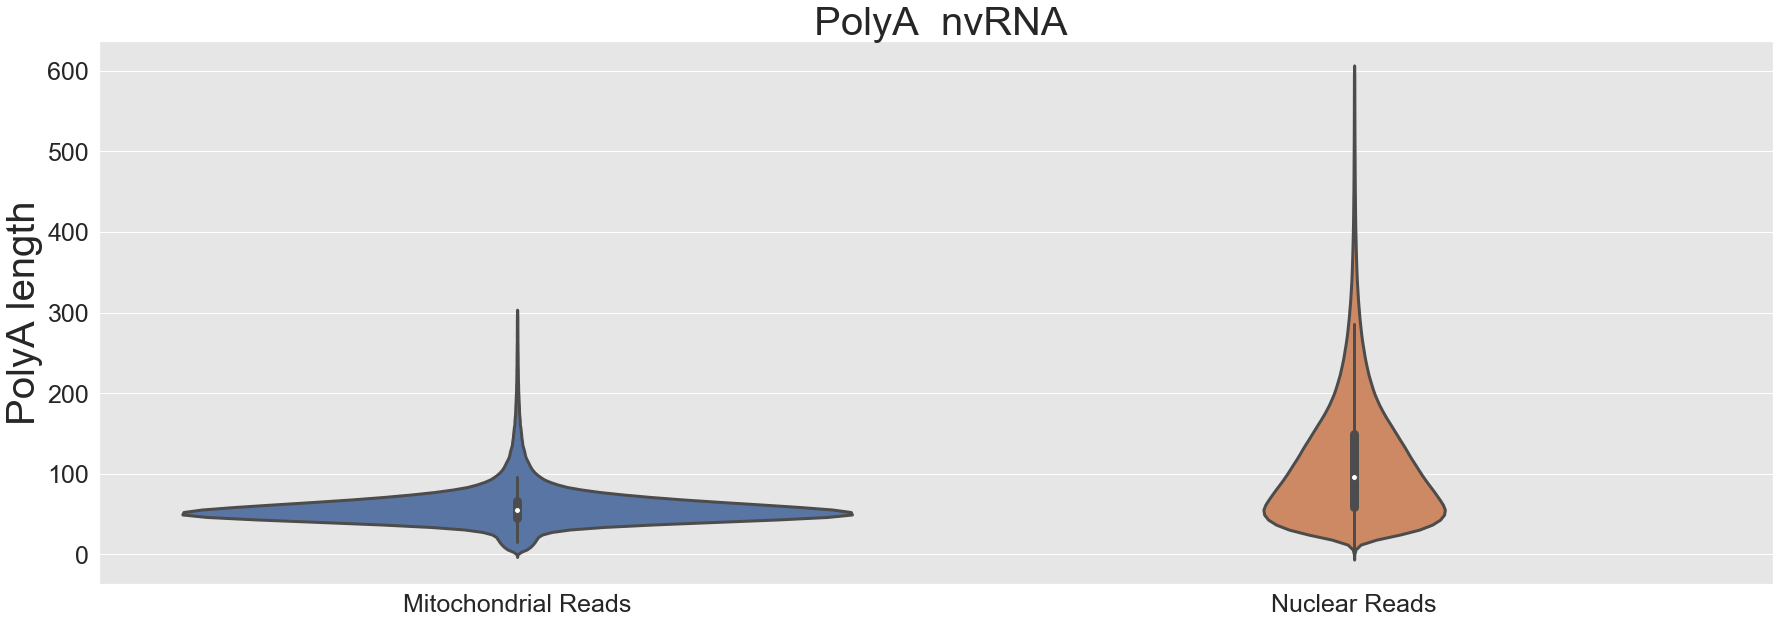

In [56]:
f = open('NA12878_DirectRNA_polyA_primary_chrM.txt')
lengths = []
for line in f:
    line_arr = line.strip().split('\t')
    polya_length = line_arr[8]
    qc_taq = line_arr[9]
    if qc_taq == 'PASS':
        
        lengths.append(float(polya_length))
f.close() 

comp = []
comp.append(np.array([x for x in lengths if x <= 300]))
comp.append(np.array([x for x in polya_lengths if x <= 600]))
ax = sns.violinplot(data=comp)

plt.title( ' PolyA  nvRNA')
ax.set_xticklabels(['Mitochondrial Reads','Nuclear Reads'])
plt.xlabel('')
plt.ylabel('PolyA length')
# plt.savefig('polya_MTvsNuc2.pdf',format='pdf')

/Users/roham/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0,0.5,'Density')

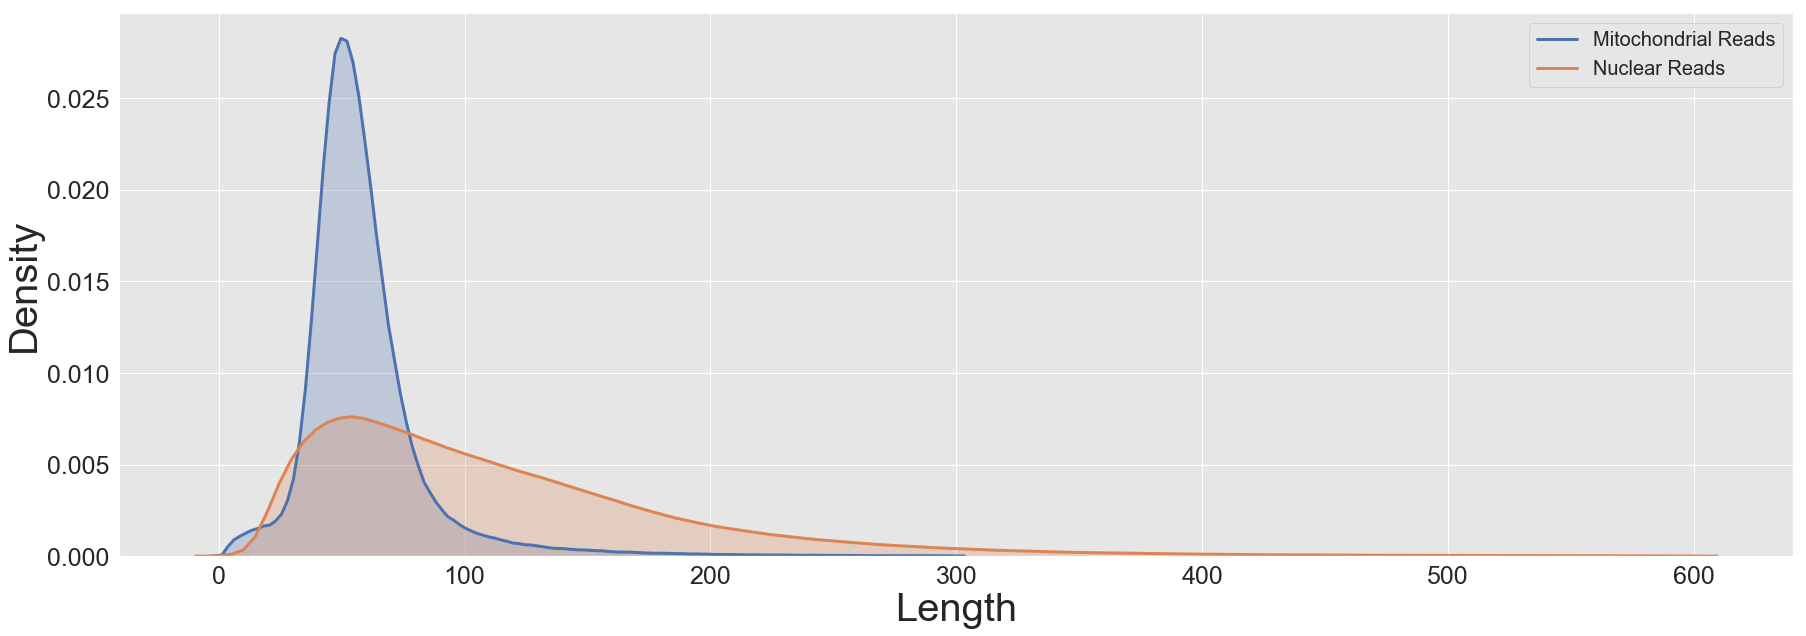

In [57]:
sns.kdeplot([x for x in lengths if x <= 300], shade=True, label='Mitochondrial Reads')
sns.kdeplot([x for x in polya_lengths if x <= 600], shade=True, label='Nuclear Reads')
plt.xlabel('Length')
plt.ylabel('Density')
# plt.savefig('polya_MTvsNuc1.pdf',format='pdf')

# Some gene specific polyA length visualization

In [96]:
df = pd.read_csv('nvrna.polya.genes.txt',sep='\t')
df.sort_values(['Reads','Mean'],ascending=False).head()

,Gene_ID,Reads,Mean,Median,SD
427,ENSG00000205542,107108,111.187499,101.09,62.693836
3621,ENSG00000156508,90609,95.961709,85.35,53.654105
1379,ENSG00000075624,75011,134.584499,126.27,60.932449
430,ENSG00000111640,58154,89.433825,74.23,56.200160
403,ENSG00000140988,54645,80.334183,66.62,52.093672


/Users/roham/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(-10, 500)

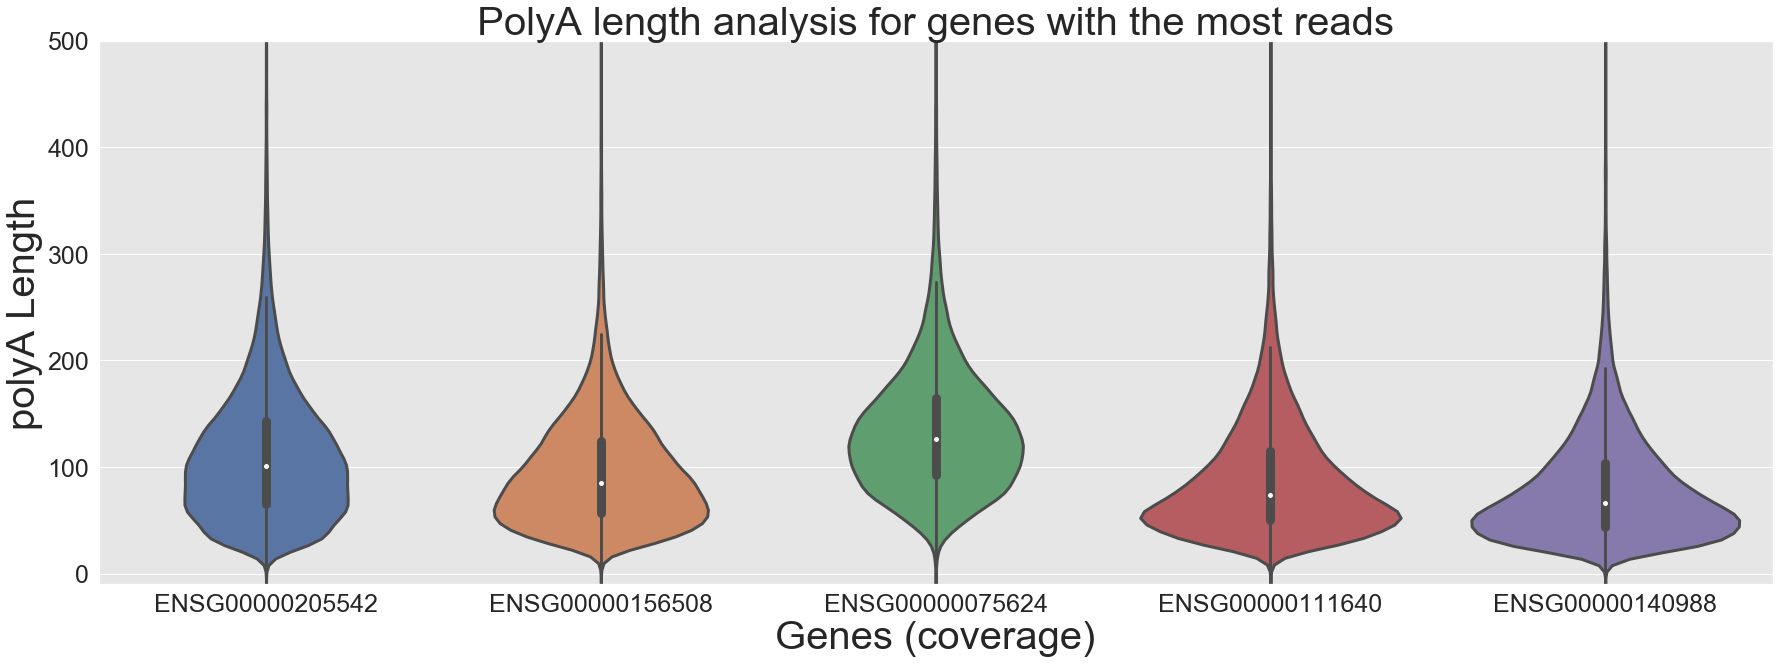

In [72]:
def violin_swarm(gene_list, gene_to_lengths, gene_name):
    arr = []
    for i in gene_list:
        arr.append(np.array(gene_to_lengths[i]))
        
    plt.figure()
    ax = sns.violinplot(data=arr)
#     ax = sns.swarmplot(data=arr, color="white", edgecolor="gray" )
    ax.set_xticklabels(gene_name)
    plt.title(  ' PolyA length analysis for genes with the most reads ')
    plt.xlabel('Genes (coverage)')
    plt.ylabel('polyA Length')

genes_plot=list(df.sort_values(['Reads','Mean'],ascending=False).head().Gene_ID)
violin_swarm(genes_plot, gene_to_polya_length, genes_plot)
plt.ylim(-10,500)

In [60]:
df.sort_values(['Mean'],ascending=False).head()

,Gene_ID,Reads,Mean,Median,SD
11089,ENSG00000273096,4,425.175000,432.225,90.803088
7149,ENSG00000205885,7,410.338571,379.440,132.044175
6360,ENSG00000075826,21,408.873333,377.480,78.623543
6816,ENSG00000172638,11,406.625455,440.800,113.966739
9915,ENSG00000266983,3,405.553333,420.000,43.963216


# Isoform specific analysis

In [75]:
df_iso = pd.read_csv('nvrna.polya.isoforms.txt',sep='\t')
df_iso[(df_iso.reads >= 100)].sort_values('Mean',ascending=False).head()

,Isoform_ID,Gene_ID,reads,Mean,Median,SD
42144,ENST00000467843,ENSG00000109046,103,391.381262,383.740,103.715715
30043,ENST00000499732,ENSG00000245532,366,350.196831,343.685,131.186276
35243,a0b7eef4-78af-40f1-a431-57ce1a9cb16e,ENSG00000134884,180,348.124556,347.080,111.403059
52710,ENST00000429829,ENSG00000229807,234,346.644274,355.415,139.632166
50215,09795e11-838a-4b01-a418-e3e95a615ca5,ENSG00000234883,176,343.281932,360.400,135.086860


In [77]:
df_iso[(df_iso.Gene_ID.isin(['ENSG00000109046']))]

,Isoform_ID,Gene_ID,reads,Mean,Median,SD
42143,ENST00000262394,ENSG00000109046,68,198.450147,198.300,118.654840
42144,ENST00000467843,ENSG00000109046,103,391.381262,383.740,103.715715
42145,60cbf1bc-fc69-4a0e-b0f3-a5ab8e55757a,ENSG00000109046,2,337.105000,337.105,16.945000
42146,69d626b5-a782-4da6-86dc-2ef3e1b85cc0,ENSG00000109046,63,330.897460,336.130,122.743321
42147,14f476c5-2806-43ff-a85c-063b6d079c1d,ENSG00000109046,18,380.557778,396.405,120.006695
42148,ed611fd7-bf10-4ffd-88d5-7f4bead00e9c,ENSG00000109046,54,322.789259,300.285,86.423633
42149,b65f0e78-d86c-485d-993c-8f2601cd3841,ENSG00000109046,5,428.524000,458.140,103.184436
42150,38e8b465-59a1-4884-bf45-87150af2144e,ENSG00000109046,9,414.064444,454.150,83.513176
42151,d6790873-1ce6-40c0-a621-6491a8683488,ENSG00000109046,23,312.403478,285.160,107.657402
42152,5e6b41e6-0a24-42f9-994f-09becb306b69,ENSG00000109046,33,294.136667,320.960,131.880560


/Users/roham/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


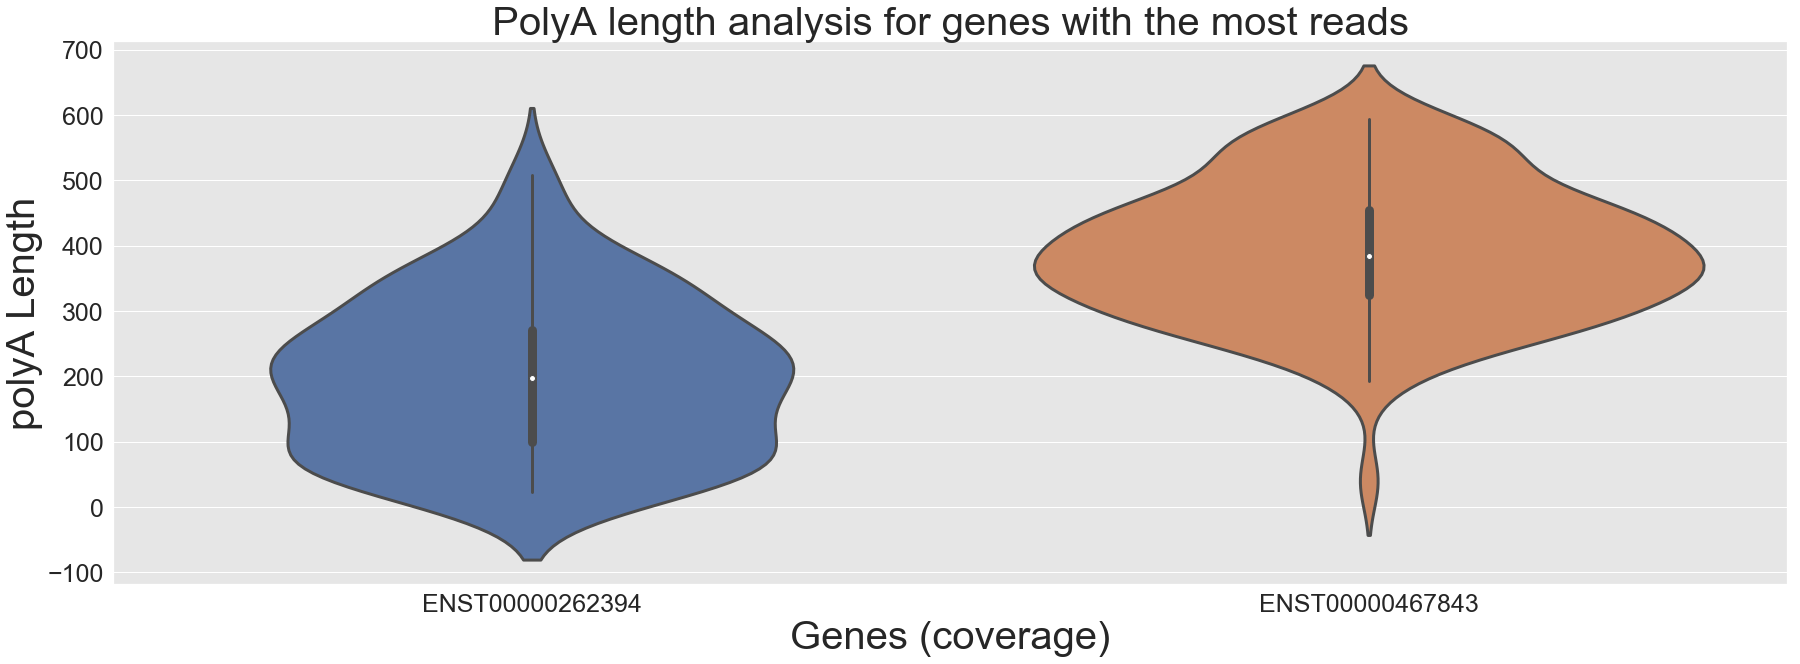

In [81]:
violin_swarm(['ENST00000262394_ENSG00000109046','ENST00000467843_ENSG00000109046'], isoform_to_polya_length, ['ENST00000262394','ENST00000467843'])

In [82]:
df_iso[(df_iso.reads >= 1000)].sort_values('Mean',ascending=False).head()

,Isoform_ID,Gene_ID,reads,Mean,Median,SD
5172,ENST00000367459,ENSG00000090104,1064,154.966306,149.995,88.667091
14451,db0b5f14-4064-47e3-b5ff-e708ba4db506,ENSG00000205542,1416,151.717585,139.295,79.989727
20331,ENST00000462494,ENSG00000075624,1107,147.313026,137.410,68.794382
37149,6379937e-c8b0-47bb-b15d-9928a822e398,ENSG00000211899,1000,146.391580,124.505,94.473755
20332,e2901f30-51e7-4745-a475-ac0085588de9,ENSG00000075624,1505,139.994645,131.920,63.002303


In [86]:
df_iso[(df_iso.Gene_ID.isin(['ENSG00000075624']))]

,Isoform_ID,Gene_ID,reads,Mean,Median,SD
5678,266a58c2-5a87-44a3-9f2f-5032c8d00a20,ENSG00000075624,1167,127.822331,122.050,58.062688
8605,178a1f1d-50ab-4b95-bae5-893fc4d2d8bb,ENSG00000075624,2370,130.230979,122.980,55.699800
15957,7d8f46dd-9752-4399-a62f-9f018b564724,ENSG00000075624,390,162.237385,137.645,94.695831
15958,7ad9deda-6d7b-4532-8b8b-ed4011888ffa,ENSG00000075624,1062,138.763701,126.590,65.656848
16001,c5bc3330-7ea4-4cc8-b183-ae8b187bc1c4,ENSG00000075624,1808,130.554176,123.430,58.536004
16482,0fe1e196-1cc4-4bf4-947a-f47656040af8,ENSG00000075624,1195,137.906100,127.130,65.058498
19931,e8f513c8-7434-436d-8e3b-9bf46cbf4386,ENSG00000075624,3034,132.401664,125.190,57.721017
20322,ENST00000331789,ENSG00000075624,42858,132.966820,125.290,58.814336
20323,cd05fbce-73fe-4d7e-91b0-73b8579fd21a,ENSG00000075624,870,138.470126,129.200,62.801885
20324,c2e098a3-287e-45e4-85b0-31504bfa1b95,ENSG00000075624,165,158.356727,160.520,65.541132


In [88]:
df_iso[(df_iso.Gene_ID.isin(['ENSG00000108654']))]

,Isoform_ID,Gene_ID,reads,Mean,Median,SD
43547,d713f34d-14f2-46df-9468-51f0ecaed35f,ENSG00000108654,23,281.402609,251.000,155.833930
43548,ENST00000585317,ENSG00000108654,63,220.655714,242.320,111.215889
43549,ENST00000225792,ENSG00000108654,705,155.718298,130.980,104.036615
43550,93acf679-7b5e-42cc-a1d5-e0f6b65eac7a,ENSG00000108654,27,255.420741,271.560,107.901610
43551,44050eaf-cb83-4ad8-a173-b0a8b04b0f5d,ENSG00000108654,8,241.450000,257.965,124.871554
43552,0e2f23f5-e1c4-463b-987e-0e729f2703b2,ENSG00000108654,16,268.126250,260.520,138.854145
43553,a1181c33-cef3-4c7b-bbe4-5efce08bb71b,ENSG00000108654,140,149.174071,120.785,110.142649
43554,d052d4e4-0972-40de-90b2-913ebd52daf9,ENSG00000108654,80,190.607375,188.710,111.591857
43555,87a1c430-50e5-4b6c-971e-3a26af421bb4,ENSG00000108654,24,166.180833,135.330,117.492633
43556,ENST00000578804,ENSG00000108654,109,155.579908,131.870,105.808719


In [95]:
df_iso[(df_iso.Gene_ID.isin(['ENSG00000211899']))]

,Isoform_ID,Gene_ID,reads,Mean,Median,SD
37117,8293ccd5-13f2-4c09-ad2f-15420257a1f5,ENSG00000211899,133,280.402180,265.750,179.328012
37126,535e21c6-6924-4795-9778-9cec7bf0f49a,ENSG00000211899,434,169.428065,135.210,120.368720
37129,f5eb6802-f8d9-4f3a-9f85-df133cf7481b,ENSG00000211899,77,312.724156,302.680,119.028472
37136,b1412d7e-f075-4993-9cef-37ce360e27f8,ENSG00000211899,118,227.191186,188.020,150.831615
37140,cfc524c1-ca45-41f2-bedd-a28e85342293,ENSG00000211899,261,136.200958,94.700,125.277610
37141,c7234977-0700-4059-83cc-902b100b95d6,ENSG00000211899,1835,110.916425,78.730,98.238528
37143,5683fbab-a2e2-4def-a69b-bf709f5d0d17,ENSG00000211899,6223,101.352883,79.850,76.396488
37145,68e10716-5141-4d15-9a2a-83e24a092dad,ENSG00000211899,981,107.954557,82.260,91.747634
37149,6379937e-c8b0-47bb-b15d-9928a822e398,ENSG00000211899,1000,146.391580,124.505,94.473755
37150,6c3ef349-8d5e-4bc5-ac4e-ff7a07f041fc,ENSG00000211899,531,151.632072,127.100,102.707657


In [ ]:
any(df['Student'].duplicated())

In [94]:
r = df_iso[(df_iso.reads >= 1000)]
r[r['Gene_ID'].duplicated()].sort_values('Gene_ID',ascending=False)

,Isoform_ID,Gene_ID,reads,Mean,Median,SD
2599,0eff88eb-718f-4631-9eb8-a70684890355,ENSG00000265681,1051,89.347355,72.910,59.744590
2598,ENST00000580261,ENSG00000265681,8902,88.538333,74.635,55.863234
22372,aca2898d-4f00-43a7-ad45-6530e370db26,ENSG00000254772,1317,88.704784,77.630,50.649994
22368,e3360c81-28e2-4a9c-baf0-7d180bc9fa4a,ENSG00000254772,1286,88.239098,77.875,51.041150
22367,34848be7-2959-424d-9b77-b7c29eb6cccb,ENSG00000254772,1096,89.441706,77.860,51.617871
22365,ENST00000329251,ENSG00000254772,13378,89.073242,76.590,54.241881
37098,dc0dabfa-7e05-48a2-806c-684bdf6e5ed6,ENSG00000253701,1310,117.262908,101.755,68.378709
37099,e9f4ba06-4ad5-46f5-b806-73f8660f9492,ENSG00000253701,3839,116.639836,102.390,68.090955
37100,4853de05-ad2b-4bb7-a7bb-55f810ff62a7,ENSG00000253701,1068,124.037818,113.105,71.859330
37101,bb698934-0501-4631-8663-0cded1d9d602,ENSG00000253701,1155,121.521792,104.590,73.220270
